# **** Modeling and Evaluation Notebook

## Objectives

* Answering Business requirement 2 : 
        *Predict whether a leaf is infected with powdery mildew or not. 

## Inputs

*  Client will input images of leaves from the following datasets : <br/>
    ** inputs/cherry-leaves_dataset/cherry-leaves/train<br/>
    ** inputs/cherry-leaves_dataset/cherry-leaves/validation <br/>
    ** inputs/cherry-leaves_dataset/cherry-leaves/test <br/> 
    ** image shape embeddings

## Outputs

* Generate images distribution plot in train, validation, and test set
* Perform image augmentation when needed
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Saved model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

## Import regular packages 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Change working directory

* Since we are storing the notebooks in a subfolder, we change the working directory.

In [2]:
import os
current_dir = os.getcwd()
current_dir
os.chdir('/workspace/mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection-in-cherry-leaves'

## Set input directories 

Set Train, Validation and Test Set

In [4]:
my_data_dir = 'inputs/cherry-leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

Set output directory 

In [5]:
import os
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old Version is already available, create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old Version is already available, create a new version.


Set Labels

In [6]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
    )

Project Labels: ['healthy', 'powdery_mildew']


Set image shape 

In [7]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pk1")
image_shape

(256, 256, 3)

# Number of images in train, test and validation data

Calculate the quantity of images in each set by generating a bar graph and save the resulting plot in the '/output/' directory.

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




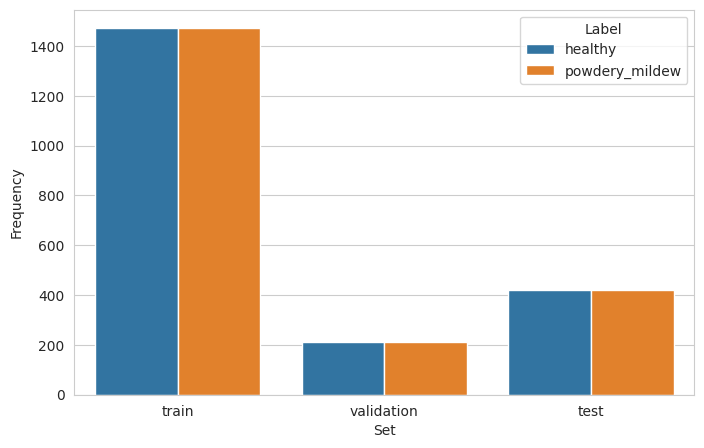

In [10]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

---

# Image data augmentation

* We'll employ image data augmentation techniques to expand our dataset by generating randomized variations of existing images. This approach will help us augment our dataset, which is currently of a moderate size.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

ImageDataGenerator
* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=25,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

Augment training image dataset 

In [14]:
batch_size = 20
train_set = augmented_image_data.flow_from_directory(train_path, #fetching images from train folder
                                                    target_size=image_shape[:2],#transforming images with average width and height 
                                                    color_mode='rgb',# standard RGB
                                                    batch_size=batch_size,
                                                    class_mode='binary', #binary class model
                                                    shuffle=True #Randomly shuffle the images
                                                    )
train_set.class_indices                                                    

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment validation image dataset

In [20]:
batch_size = 20
validation_set = augmented_image_data.flow_from_directory(val_path, #fetching images from validation folder
                                                    target_size=image_shape[:2],#transforming images with average width and height 
                                                    color_mode='rgb',# standard RGB
                                                    batch_size=batch_size,
                                                    class_mode='binary', #binary class model
                                                    shuffle=False
                                                    )
train_set.class_indices    

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment test image dataset

In [21]:
batch_size = 20
test_set = augmented_image_data.flow_from_directory(test_path, #fetching images from test folder
                                                    target_size=image_shape[:2],#transforming images with average width and height 
                                                    color_mode='rgb',# standard RGB
                                                    batch_size=batch_size,
                                                    class_mode='binary', #binary class model
                                                    shuffle=False
                                                    )
train_set.class_indices  

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Plot Augmented Training image 

(20, 256, 256, 3)


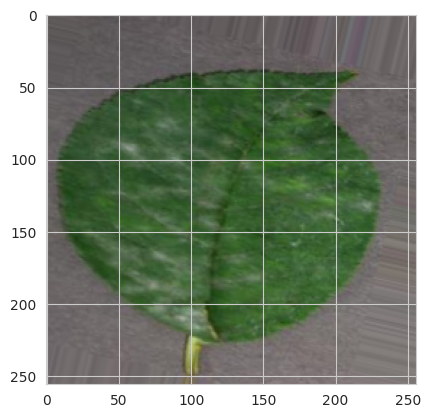

(20, 256, 256, 3)


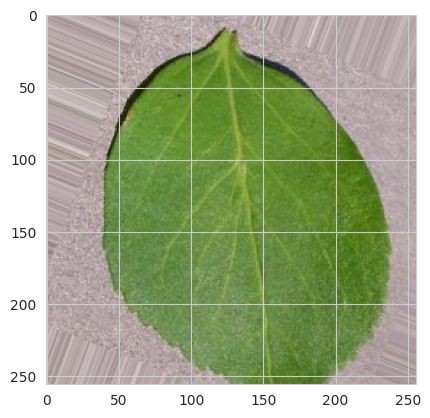

(20, 256, 256, 3)


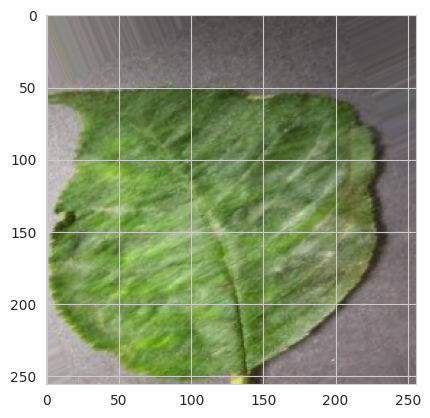

In [23]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Plot Validation Augmented set 

(20, 256, 256, 3)


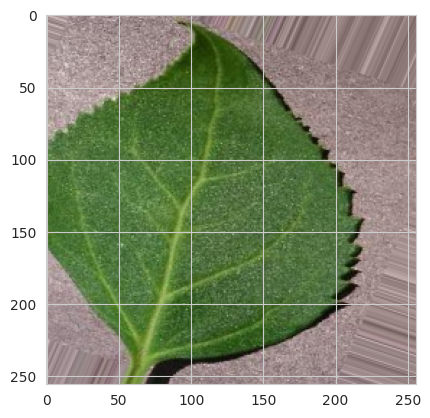

(20, 256, 256, 3)


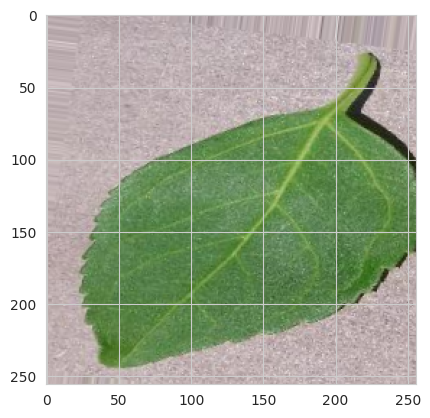

(20, 256, 256, 3)


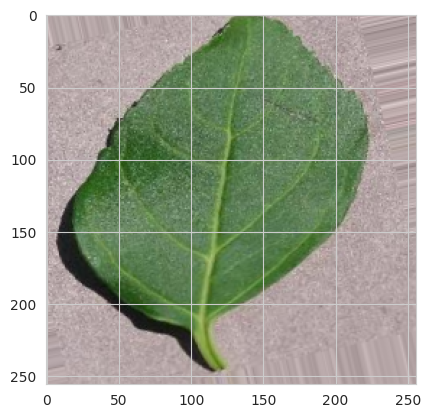

In [24]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Plot Augmented Test Dataset 

(20, 256, 256, 3)


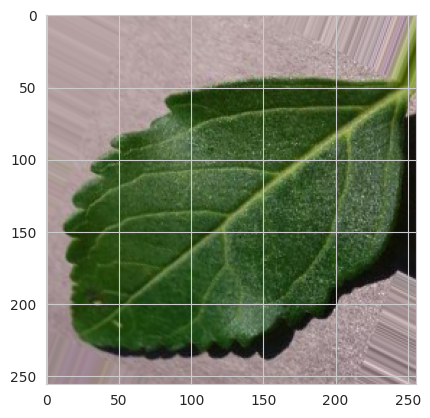

(20, 256, 256, 3)


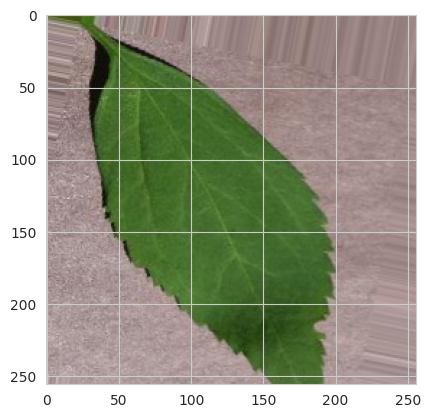

(20, 256, 256, 3)


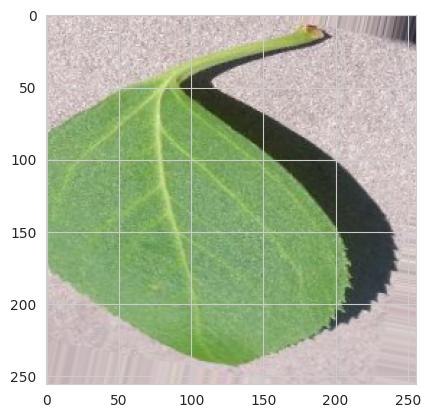

In [25]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Save class_indices

In [26]:
joblib.dump(value=train_set.class_indices ,
            filename=f'{file_path}/class_indices.pk1')

['outputs/v1/class_indices.pk1']

## Model Creation

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
